In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.4/778.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.8 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from urllib.request import urlretrieve
from zipfile import ZipFile
from torchsummary import summary

In [5]:
model = YOLO('yolov9c.pt')
modelft = YOLO('/content/drive/MyDrive/Colab Notebooks/yolov9cft.pt')

100%|██████████| 49.4M/49.4M [00:00<00:00, 326MB/s]


In [6]:
def ReadFiles():
    path = '/content/drive/MyDrive/Colab Notebooks/DataBase_yolo'
    files = os.listdir(path)
    files = [os.path.join(path, i) for i in files]
    return files

files = ReadFiles()

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time as t

def Predict(image, model):
    t1 = t.time()
    results = model.predict(source=image, imgsz=640)
    t2 = t.time()
    print(t2 - t1)

    boxes = results[0].boxes.data
    boxes = boxes.cpu()
    boxes = boxes.numpy()
    boxes = boxes.astype(int)
    class_names = results[0].names
    img = results[0].orig_img
    for box in boxes:
        x1, y1, x2, y2, s, d = box
        label = class_names[d]
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        img = cv2.putText(img, f'{label}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(img)
    plt.show()

/content/drive/MyDrive/Colab Notebooks/DataBase_yolo/360_F_516422099_NtZadRTcR8hOg6wmc0ASg0l4MB3ISMUP (copy).jpg

image 1/1 /content/drive/MyDrive/Colab Notebooks/DataBase_yolo/360_F_516422099_NtZadRTcR8hOg6wmc0ASg0l4MB3ISMUP (copy).jpg: 480x640 1 cow, 40.3ms
Speed: 2.0ms preprocess, 40.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
0.05975461006164551


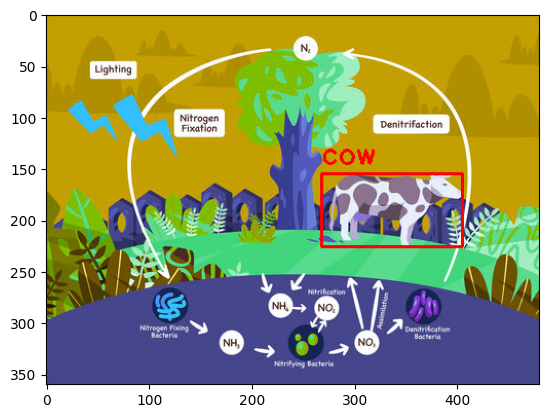


image 1/1 /content/drive/MyDrive/Colab Notebooks/DataBase_yolo/360_F_516422099_NtZadRTcR8hOg6wmc0ASg0l4MB3ISMUP (copy).jpg: 480x640 1 cow, 78.3ms
Speed: 2.9ms preprocess, 78.3ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)
0.1164407730102539


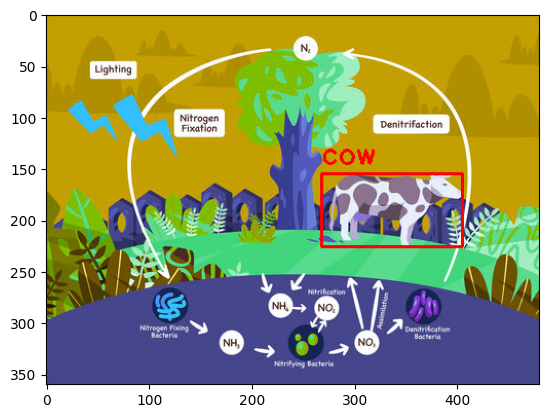

In [23]:
image = files[0]
print(image)
Predict(image, model)
Predict(image, modelft)